# 0.0 PLANEJAMENTO DA SOLUÇÃO

### 0.1 INPUT

 - PROBLEMA DE NEGOCIO
    -   SELECIONAR OS CLIENTES MAIS VALIOSOS PARA UM PROGRAMA DE FIDELIDADE
 - CONJUNTO DE DADOS
   -  VENDA DE UM ECOMMERCE ONLINE, DURANTE O PERIODO DE UM ANO

### 0.2 OUTPUT

- A INDICAÇÃO DAS PESSOAS QUE FARÃO PARTE DO PROGRAMA DE FIDELIDADE
    - LISTA: client_id | is_insider
- RELATORIO COM AS RESPOSTAS DAS PERGUNTAS DE NEGOCIO
    - QUAIS SAO AS PESSOAS ELEGIVEIS PARA PARTICIPAR DO PROGRAMA DE FIDELIDADE
    - QUANTOS CLIENTES FARÃO PARTE DO GRUPO
    - QUAIS AS PRINCIPAIS CARACTERISTICAS DESSES CLIENTES
    - QUAL A PORCENTAGEM DE CONTRIBUIÇÃO VINDO DESSES INSIDERS
    - QUAL A EXPECTATIVA DE FATURAMENTO PARA ESSE GRUPO NOS PROXIMOS MESES
    - QUAIS AS CONDIÇÕES PARA UMA PESSOA SER ELEGIVEL PARA O INSIDERS
    - QUAIS AS CONDIÇÕES PARA UMA PESSOA SER REMOVIDA DO INSIDERS
    - QUAL A GARANTIA QUE O PROGRAMA DE FIDELIDADE É MELHOR QUE O RESTANTE DA BASE
    - QUAIS AS AÇÕES O TIME DE MARKETING PODE REALIZAR PARA AUMENTAR O FATURAMENTO

### 0.3 TASKS

- QUAIS SAO AS PESSOAS ELEGIVEIS PARA PARTICIPAR DO PROGRAMA DE FIDELIDADE
    -   O QUE É SER ELEGIVEL? O QUE SÃO OS CLIENTES DE MAIOR VALOR?
    -   FATURAMENTO
        -   ALTO TICKET MEDIO
        -   ALTO LIFE TIME VALUE
        -   BAIXA RECÊNCIA
        -   ALTO BASKET SIZE
        -   BAIXA PROBABILIDADE DE CHURN
        -   ALTA PREVISÃO DE LTV
        -   ALTA PROPENSÃO DE COMPRA

    -   CUSTO
        -   BAIXA TAXA DE DEVOLUÇÃO

    -   EXPERIENCIA DE COMPRA
        -   MEDIA ALTA DAS AVALIAÇÕES

- QUANTOS CLIENTES FARÃO PARTE DO GRUPO
    -   NUMERO TOTAL DE CLIENTES
    -   % DO NUMERO DE INSIDERS

- QUAIS AS PRINCIPAIS CARACTERISTICAS DESSES CLIENTES
    -   ESCREVER CARACTERISTICAS DO CLIENTE
        -   IDADE
        -   LOCALIZAÇÃO

    - CARACTERISTICAS DO CONSUMO
        - FEATURES DA CLUSTERING

- QUAL A PORCENTAGEM DE CONTRIBUIÇÃO VINDO DESSES INSIDERS
    - FATURAMENTO TOTAL E COMPARA COM O FATURAMENTO DO GRUPO

- QUAL A EXPECTATIVA DE FATURAMENTO PARA ESSE GRUPO NOS PROXIMOS MESES
    - LTV DO INSIDERS
    - ANALISE DE COHORT

- QUAIS AS CONDIÇÕES PARA UMA PESSOA SER ELEGIVEL PARA O INSIDERS
    - DEFINIR PERIODICIDADE (MES, 3 MESES...)
    - A PESSOA PRECISA SER PARECIDA COM OUTRA PESSOA DO GRUPO INSIDERS

- QUAIS AS CONDIÇÕES PARA UMA PESSOA SER REMOVIDA DO INSIDERS
    - DEFINIR PERIODICIDADE
    - A PESSOA PRECISA SER DISIMILAR DO RESTANTE DO GRUPO INSIDERS

- QUAL A GARANTIA QUE O PROGRAMA DE FIDELIDADE É MELHOR QUE O RESTANTE DA BASE
    - TESTE A/B
    - TESTE A/B BAYESIANO
    - TESTE DE HIPÓTESES

- QUAIS AS AÇÕES O TIME DE MARKETING PODE REALIZAR PARA AUMENTAR O FATURAMENTO
    - DESCONTO
    - PREFERENCIA DE COMPRA
    - FRETE
    - VISITA A EMPRESA

### 0.4 BENCHMARK - PESQUISA

- DESK RESEARCH

MODELO RFM
-   RECÊNCIA: TEMPO DESDE A ULTIMA COMPRA
    - ORDENA PELA RECÊNCIA, DEPOIS VAI DAR UMA NOTA, PROPORCIONAL A BASE SELECIONADA
-   FREQUÊNCIA: QUANTIDADE DE COMPRA FEITAS NA EMPRESA
    - ORDENA PELA FREQUÊNCIA, DEPOIS VAI DAR UMA NOTA, PROPORCIONAL A BASE SELECIONADA
-   MONETÁRIA: TOTAL GASTO, "HIGH-VALUE PURCHASE"
    - ORDENA PELA MONETÁRIA, DEPOIS VAI DAR UMA NOTA, PROPORCIONAL A BASE SELECIONADA

- FAZ A MÉDIA DAS 3 NOTAS E ORDENA PELA MAIOR NOTA

- SEGMENTAÇÃO: PELA 2 DAS NOTAS, E BOTA A TERCEIRA NOTA COMO COR NO GRÁFICO

# 1.0 IMPORT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display        import HTML
from sklearn import cluster as c
from sklearn import metrics as m
from sklearn import preprocessing as pp
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from plotly import express as px
import umap.umap_ as umap

c:\Users\jocaf\anaconda3\envs\cluster\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1.1 HELPER FUNCTIONS

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline

    plt.style.use( 'ggplot' )
    plt.rcParams['figure.figsize'] = [18, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>' ) )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings();

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 1.2 LOAD DATA

In [3]:
df = pd.read_csv( "..\data\Ecommerce.csv", encoding = "ISO-8859-1" )
df1 = df.drop( columns=['Unnamed: 8'], axis=1 )

In [4]:
df1.shape

(541909, 8)

In [5]:
df1.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
135629,547906,21165,BEWARE OF THE CAT METAL SIGN,1,26-Mar-17,1.69,14410.0,United Kingdom
356977,568062,21212,PACK OF 72 RETROSPOT CAKE CASES,24,21-Sep-17,0.55,14014.0,United Kingdom
102184,544970,22457,NATURAL SLATE HEART CHALKBOARD,6,23-Feb-17,2.95,13362.0,United Kingdom
150892,549525,21812,GARLAND WITH HEARTS AND BELLS,1,6-Apr-17,9.96,NaN,United Kingdom
454167,575512,21990,MODERN FLORAL STATIONERY SET,12,8-Nov-17,1.25,14121.0,United Kingdom


# 2.0 DESCRIÇÃO DOS DADOS

In [174]:
df2 = df1.copy()

## 2.1 Rename Columns

In [175]:
cols = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
df2.columns = cols
df2.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

## 2.2 Data dimensions

In [176]:
print(f'Number of rows: {df2.shape[0]}')
print(f'Number of columns: {df2.shape[1]}')

Number of rows: 541909
Number of columns: 8


## 2.3 Data types

In [177]:
df2.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 2.4 Check NA

In [178]:
df2.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 2.5 Replace NA

In [179]:
df_missing = df2.loc[df2['customer_id'].isna(), :]
df_not_missing = df2.loc[~df2['customer_id'].isna(), :]
df_missing.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
622,536414,22139,NaN,56,29-Nov-16,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,29-Nov-16,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,29-Nov-16,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,29-Nov-16,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,29-Nov-16,1.66,NaN,United Kingdom


In [180]:
# creating reference
df_backup = pd.DataFrame( df_missing['invoice_no'].drop_duplicates() )
df_backup['customer_id'] = np.arange( 30000, 30000+len( df_backup ), 1 )

# merge to dataframe
df2 = pd.merge(df2, df_backup, on='invoice_no', how='left')

# coalesce
df2['customer_id'] = df2['customer_id_x'].combine_first( df2['customer_id_y'] )
df2.head()

# drop extra columns
df2 = df2.drop( columns=['customer_id_x', 'customer_id_y'], axis=1 )

In [181]:
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,United Kingdom,17850.0


In [182]:
df2.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

## 2.6 Change Dtypes

In [183]:
# invoice date
df2['invoice_date'] = pd.to_datetime( df2['invoice_date'], format='%d-%b-%y' )

# customer id
df2['customer_id'] = df2['customer_id'].astype(int)

In [184]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int32
dtype: object

## 2.7 Descriptive Statistics

In [185]:
num_attributes = df2.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df2.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 2.7.1 Numerical Attributes

In [186]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - standard deviation, min, max, range skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# cancat
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097


1. quantidade negativa
2. preço unitario igual a zero

### 2.7.2 Categorical Attributes

In [187]:
cat_attributes.head()

,invoice_no,stock_code,description,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,17850


In [188]:
# invoice number - identification of non-number 'invoice_no'
df_analysis_invoice = df2.loc[df2['invoice_no'].apply( lambda x: bool(re.search( '[^0-9]+', x ) ) ), :]

print( f'Total Num of Invoice: {len( df_analysis_invoice )}')
print( 'Total Num of Negative Quantity: {}'.format( len( df_analysis_invoice[df_analysis_invoice['quantity'] < 0] ) ))

Total Num of Invoice: 9291
Total Num of Negative Quantity: 9288


In [189]:
# stock code - identification of non-number 'stock_code'
df_analysis_stock = df2.loc[df2['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), :]
print('These are the uniques non-number of "stock code": \n{}'.format( df_analysis_stock['stock_code'].unique() ) )

# Action: We dunno anything about these uniques codes
## Then we gonna remove it

These are the uniques non-number of "stock code": 
['POST' 'D' 'DOT' 'M' 'S' 'AMAZONFEE' 'm' 'DCGSSBOY' 'DCGSSGIRL' 'PADS'
 'B' 'CRUK']


In [190]:
# Description
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


In [191]:
# Country
df2['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [192]:
df2['country'].value_counts( normalize=True ).head()

United Kingdom    0.914320
Germany           0.017521
France            0.015790
EIRE              0.015124
Spain             0.004674
Name: country, dtype: float64

In [193]:
df2[['customer_id','country']].drop_duplicates().groupby('country').count().reset_index().sort_values('customer_id', ascending=False).head()

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31


# 3.0 FEATURE FILTERING

In [194]:
df3 = df2.copy()

In [195]:
# Numerical Attributes
## unit price > 0.04
df3 = df3.loc[df3['unit_price'] > 0.04, :]

# Categorical Attributes
## stock code != [POST, D, M, DOT, CRUK, C2]
df3 = df3[~df3['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK'] )]

## description
df3 = df3.drop(columns='description', axis=1)

## map
df3 = df3[~df3['country'].isin(['European Community', 'Unspecified'] )]

In [196]:
# quantity - products that has been returned vs purchased
df_return = df3.loc[df3['quantity'] < 0, :]
df_purchase = df3.loc[df3['quantity'] >= 0, :]

In [197]:
df_purchase.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850


# 4.0 FEATURE ENGINEERING

- Moving Average
- Quantidade de compras, em cada quinzena do mês.

In [198]:
df4 = df3.copy()

In [199]:
df4.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850


## 4.1 Feature Creation

In [200]:
# data reference
df_ref = df4.drop( ['invoice_no', 'stock_code', 'quantity',
                    'invoice_date', 'unit_price','country'], axis=1 ).drop_duplicates( ignore_index=True )

In [201]:
pd.options.mode.chained_assignment = None

### 4.1.1 Gross Revenue

In [202]:
# Gross Revenue (Faturamento) quantity * price = faturamento
df_purchase['gross_revenue'] = df_purchase['quantity'] * df_purchase['unit_price']

# Monetary
df_monetary = df_purchase[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )

### 4.1.2 Recency

In [203]:
# Recency
df_recency = df_purchase[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df_purchase['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )

### 4.1.3 Purchased Products

In [204]:
# Number of purchased products by customer
df_frequency = df_purchase[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge( df_ref, df_frequency, on='customer_id', how='left' )

### 4.1.3 Quantity Products

In [205]:
# Number of purchased products by customer
df_frequency = df_purchase[['customer_id', 'quantity']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge( df_ref, df_frequency, on='customer_id', how='left' )

### 4.1.4 AVG Ticket Value

In [206]:
# AVG Ticket
df_avg_ticket = df_purchase[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
invoice_no       91
quantity         91
avg_ticket       91
dtype: int64

### 4.1.5 AVG Recency Days

In [207]:
df_aux = df4[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=[True, True] )
df_aux['next_customer_id'] = df_aux['customer_id'].shift()
df_aux['previous_date'] = df_aux['invoice_date'].shift()

df_aux['avg_recency_days'] = df_aux.apply( lambda x: ( x['invoice_date'] - x['previous_date'] ).days
                                                  if ( x['customer_id'] == x['next_customer_id'] )
                                                  else np.nan, axis=1 )

df_aux = df_aux.drop(['invoice_date', 'next_customer_id', 'previous_date'], axis=1).dropna()
df_avg_recency_days = df_aux.groupby('customer_id').mean().reset_index()
df_ref = pd.merge( df_ref, df_avg_recency_days, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
invoice_no            91
quantity              91
avg_ticket            91
avg_recency_days    2816
dtype: int64

### 4.1.6 Frequency

In [208]:
df_max = df4[['customer_id', 'invoice_date']].drop_duplicates().groupby( 'customer_id' ).max().reset_index()
df_min = df4[['customer_id', 'invoice_date']].drop_duplicates().groupby( 'customer_id' ).min().reset_index()
df_purchase = df4[['customer_id', 'invoice_date']].drop_duplicates().groupby( 'customer_id' ).count().reset_index()
df_purchase.head()

,customer_id,invoice_date
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [209]:
df_aux = ( df4[['invoice_date', 'customer_id', 'invoice_no']].drop_duplicates()
                                                             .groupby( 'customer_id' )
                                                             .agg( max_=( 'invoice_date', 'max' ), 
                                                                   min_=( 'invoice_date', 'min' ),
                                                                   days_=( 'invoice_date', lambda x: ( ( x.max() - x.min() ).days ) + 1 ),
                                                                   buy_=( 'invoice_no', 'count' ) ) ).reset_index()

# Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if x['days_'] != 0 else 0, axis=1 )

df_ref = pd.merge( df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
invoice_no            91
quantity              91
avg_ticket            91
avg_recency_days    2816
frequency              0
dtype: int64

In [210]:
df_aux.sort_values('frequency', ascending=False).head(7)

,customer_id,max_,min_,days_,buy_,frequency
2777,16120,2017-10-09,2017-10-09,1,5,5.0
2020,15098,2017-06-08,2017-06-08,1,4,4.0
2687,16000,2017-12-05,2017-12-05,1,3,3.0
2635,15920,2017-07-06,2017-07-06,1,3,3.0
3813,17545,2017-10-25,2017-10-25,1,3,3.0
4245,18139,2017-11-20,2017-11-19,2,6,3.0
4164,18024,2017-07-08,2017-07-08,1,3,3.0


### 4.1.6 Number of Return

### 4.1.7 Basket Size

In [120]:
df_purchase.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850,15.30
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850,20.34
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850,22.00
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850,20.34
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850,20.34


In [118]:
# AVG Ticket
df_avg_ticket = df_purchase[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id        0
gross_revenue     27
recency_days_x    27
invoice_no_x      27
avg_ticket_x      27
recency_days_y    27
invoice_no_y      27
avg_ticket_y      27
dtype: int64

In [38]:
# # Return Number
# df_return2 = df_return[['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index().rename(columns={'invoice_no':'returns'})
# df_ref = pd.merge( df_ref, df_return2, on='customer_id', how='left' )
# df_ref.loc[df_ref['returns'].isna(), 'returns'] = 0
# df_ref.isna().sum()

# 5.0 EDA

In [39]:
df5 = df_ref.dropna().copy()

In [40]:
df5.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,5391.21,372.0,34.0,18.152222
1,13047,3232.59,56.0,9.0,18.904035
2,12583,6705.38,2.0,15.0,28.902500
3,13748,948.25,95.0,5.0,33.866071
4,15100,876.00,333.0,3.0,292.000000


In [41]:
df5.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
invoice_no       0
avg_ticket       0
dtype: int64

# 6.0 DATA PREPARATION

In [42]:
df6 = df5.copy()

In [43]:
ss = pp.MinMaxScaler()

df6['gross_revenue'] = ss.fit_transform( df6[['gross_revenue']] )
df6['recency_days'] = ss.fit_transform( df6[['recency_days']] )
df6['invoice_no'] = ss.fit_transform( df6[['invoice_no']] )
df6['avg_ticket'] = ss.fit_transform( df6[['avg_ticket']] )
# df6['returns'] = ss.fit_transform( df6[['returns']] )

In [44]:
df6.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,0.019301,0.997319,0.160976,0.000208
1,13047,0.011567,0.150134,0.039024,0.000218
2,12583,0.024009,0.005362,0.068293,0.000347
3,13748,0.003384,0.254692,0.019512,0.000412
4,15100,0.003125,0.892761,0.009756,0.003756


# 7.0 FEATURE SELECTION

In [45]:
df7 = df6.copy()

# 8.0 HYPERPARAMETER FINE TUNNING

In [171]:
X = df7.drop(columns = ['customer_id'], axis=1)

In [172]:
clusters = [2, 3, 4, 5, 6, 7]

## 8.1 Within-Cluster Sum of Square (WSS)

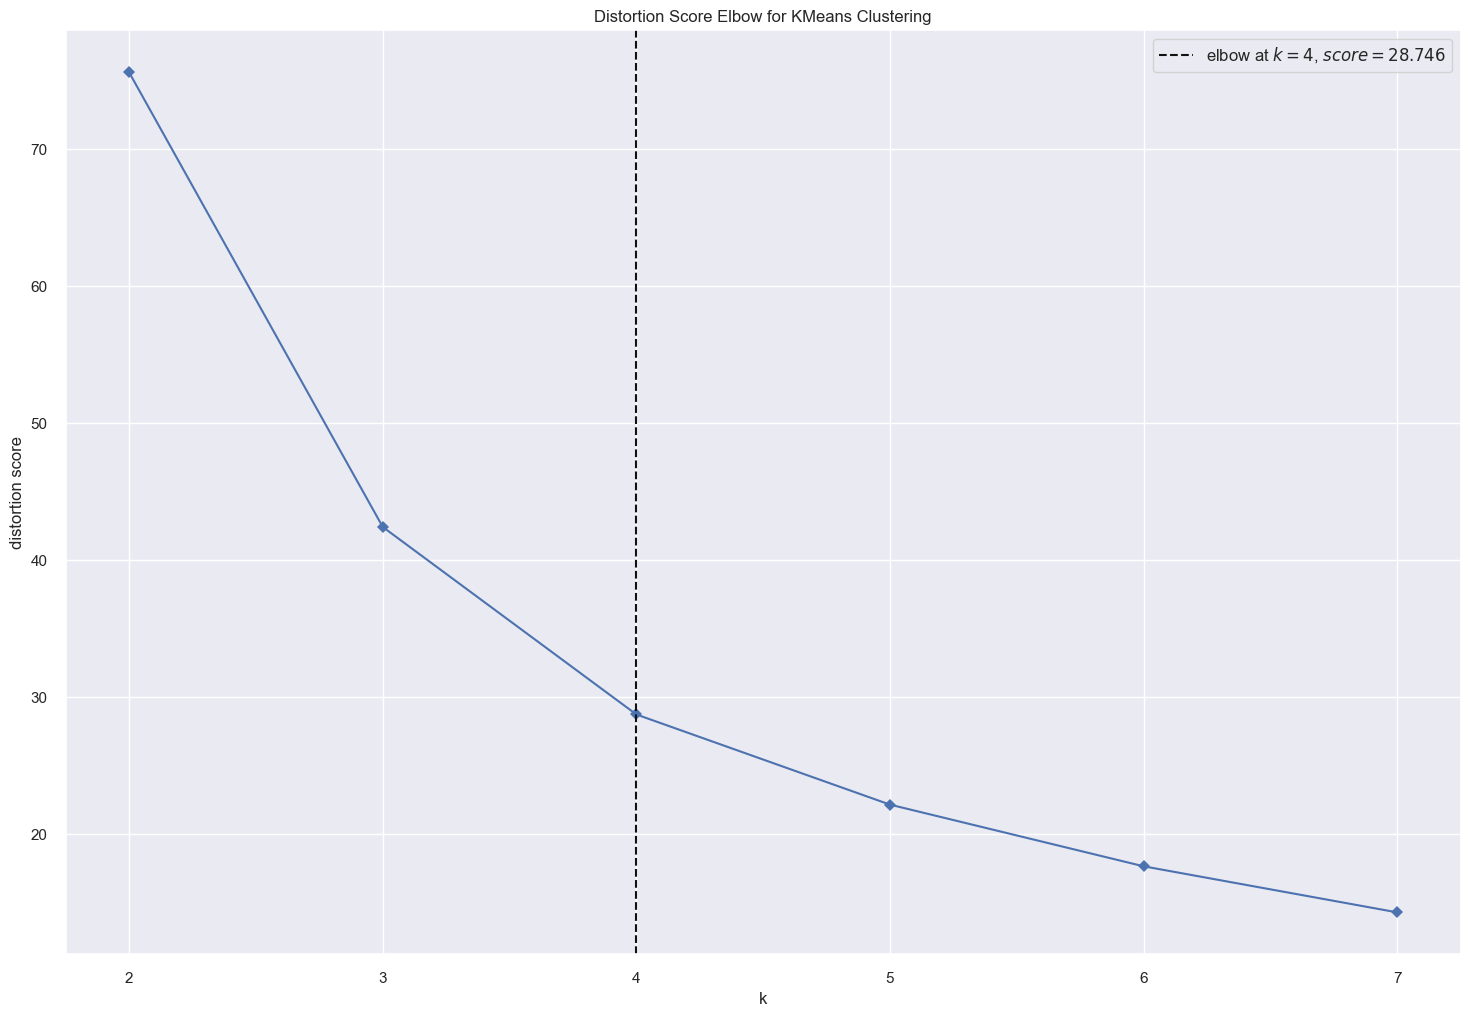

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [173]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show()

## 8.2 Silhouette Score

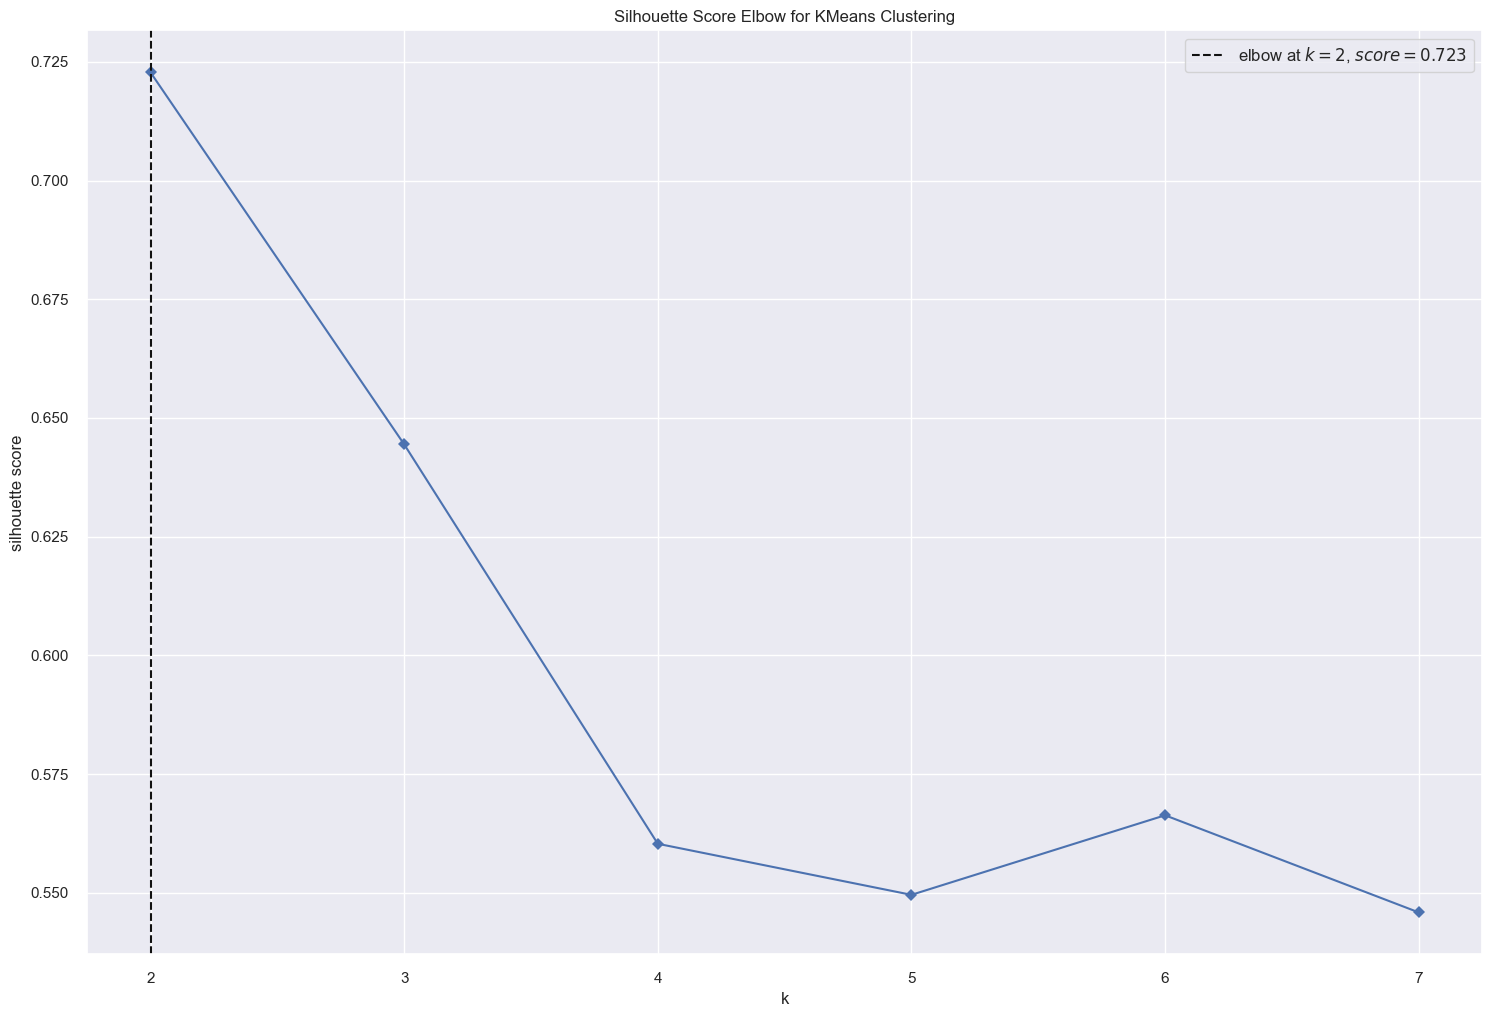

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [174]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False)
kmeans.fit(X)
kmeans.show()

## 8.3 Silhouette Analysis

In [152]:
# fig, ax = plt.subplots( 3, 2, figsize=(12, 6) )
# for x in clusters:
#     km = c.KMeans( n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42 )
#     q, mod = divmod( k, 2 )
    
#     visualizer = SilhouetteVisualizer( km, colors='yellowbrick', ax=ax[q-1][mod] )
#     visualizer.fit(X)
#     visualizer.finalize()

#### K = 2

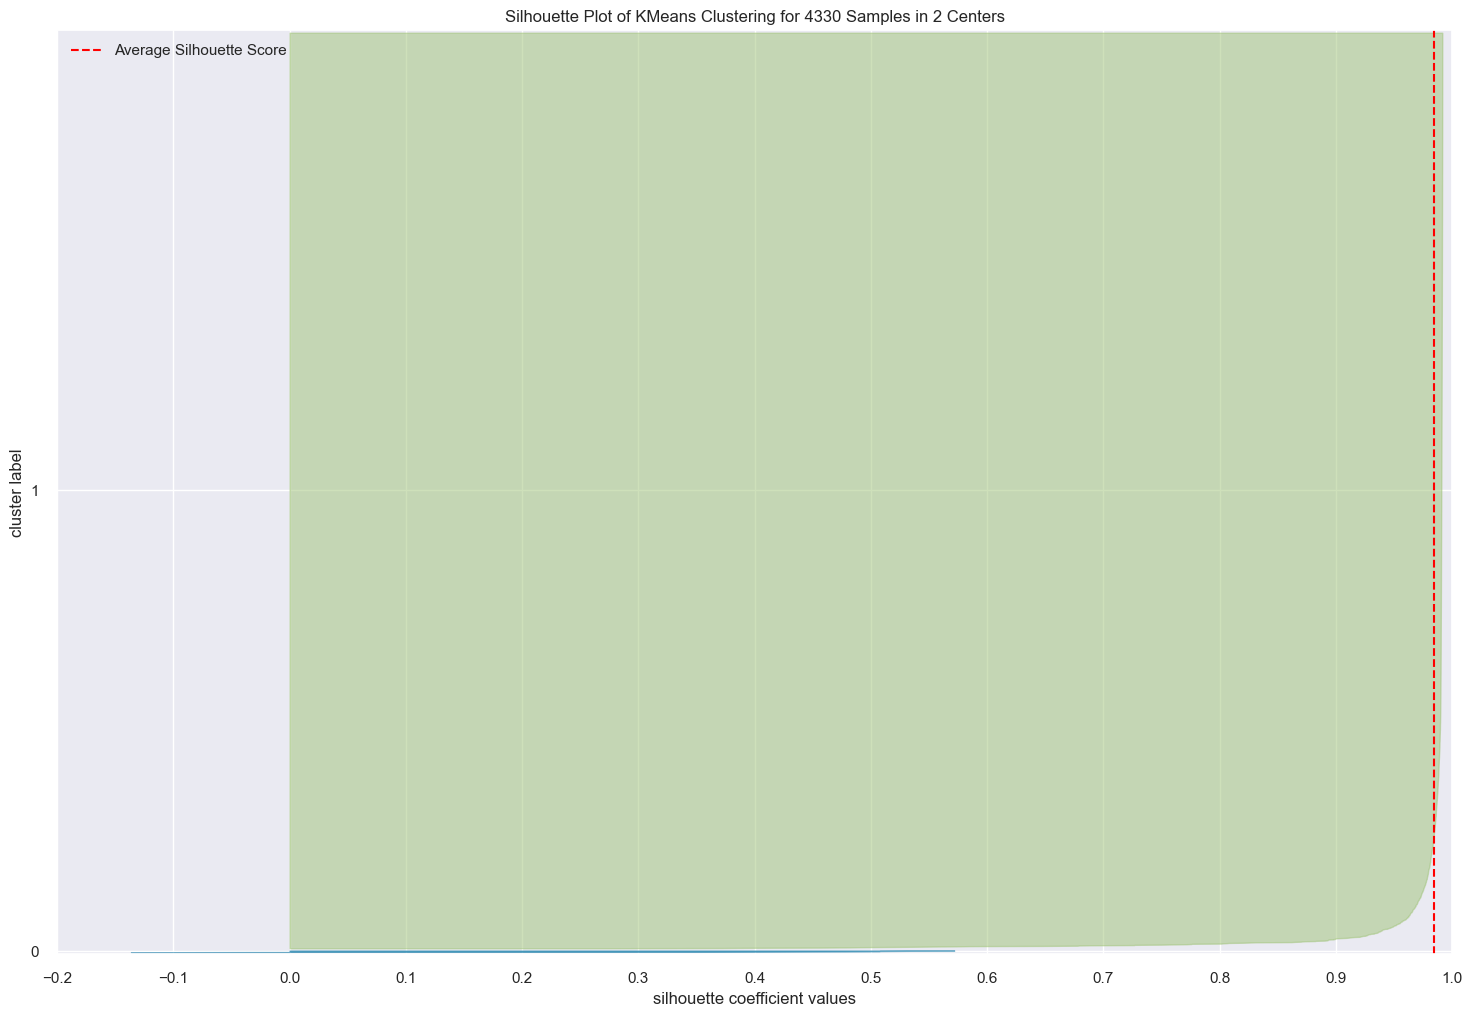

In [153]:
km = c.KMeans( n_clusters=2, init='random', n_init=10, max_iter=300, random_state=42 )
visualizer = SilhouetteVisualizer( km, colors='yellowbrick' )
visualizer.fit(X)
visualizer.finalize()

#### K = 3

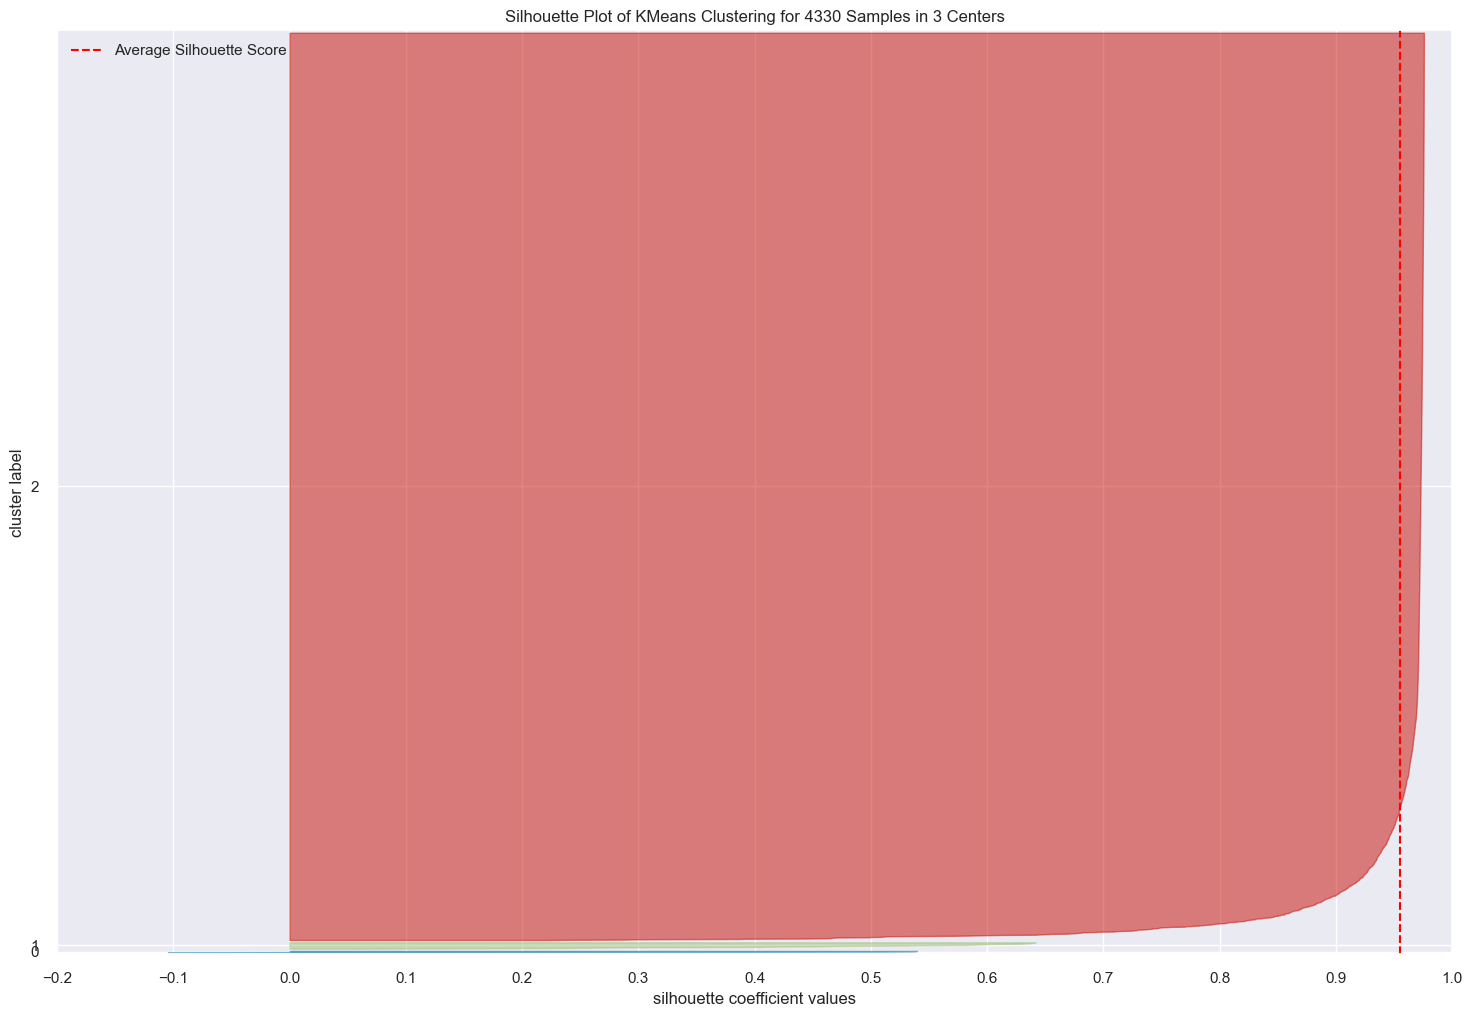

In [154]:
km = c.KMeans( n_clusters=3, init='random', n_init=10, max_iter=300, random_state=42 )
visualizer = SilhouetteVisualizer( km, colors='yellowbrick' )
visualizer.fit(X)
visualizer.finalize()

#### K = 4

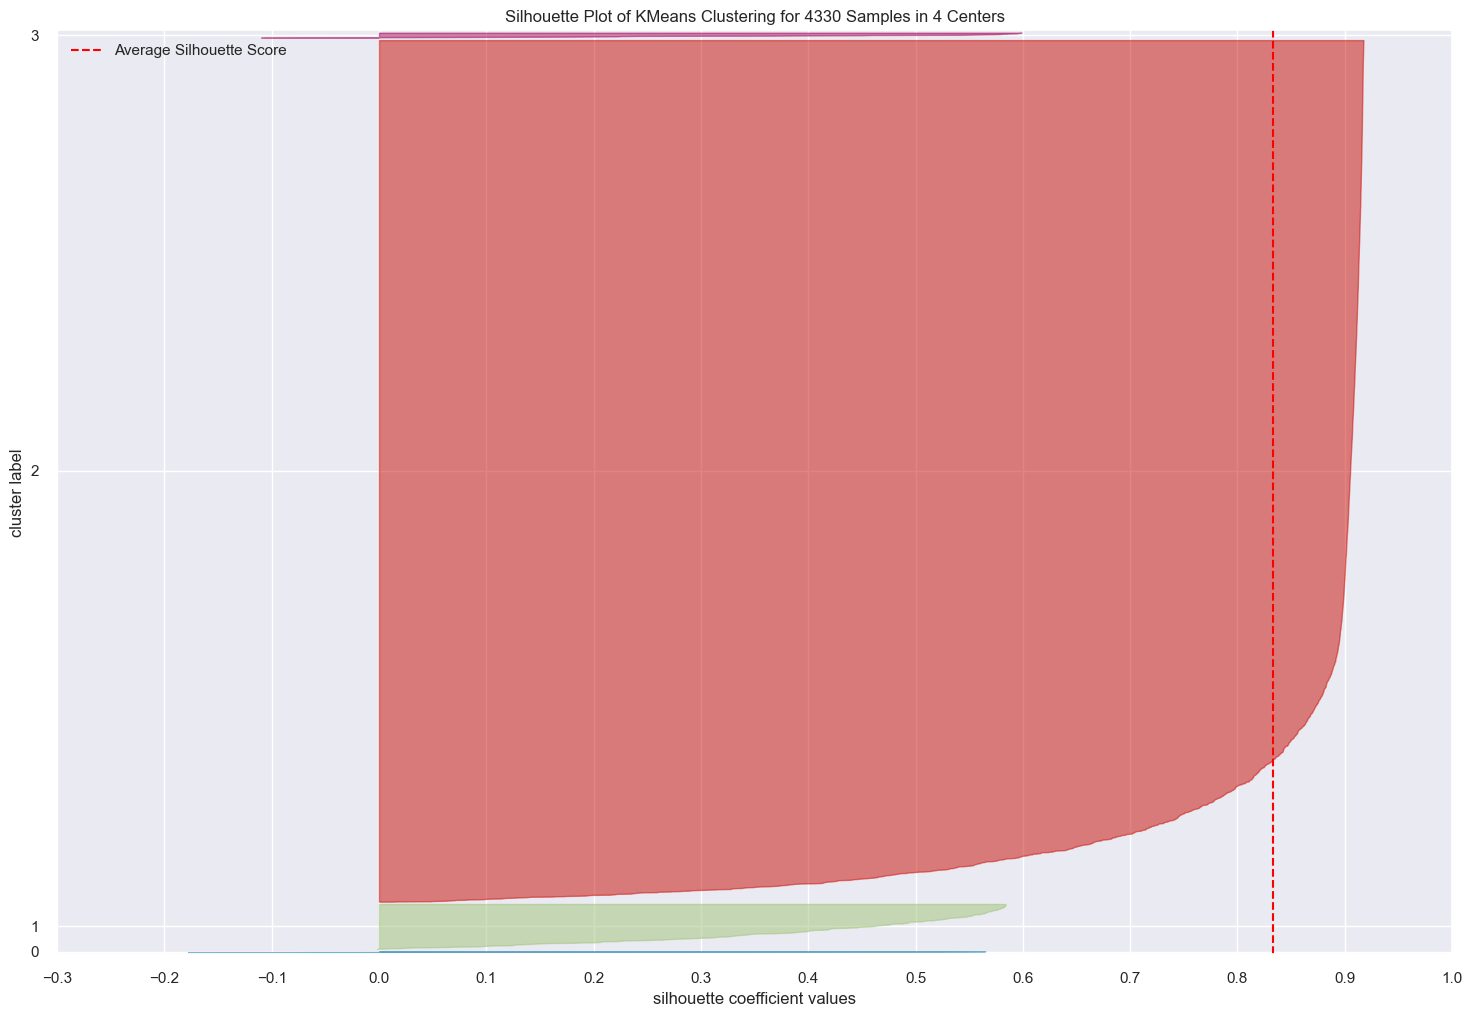

In [155]:
km = c.KMeans( n_clusters=4, init='random', n_init=10, max_iter=300, random_state=42 )
visualizer = SilhouetteVisualizer( km, colors='yellowbrick' )
visualizer.fit(X)
visualizer.finalize()

#### K = 5

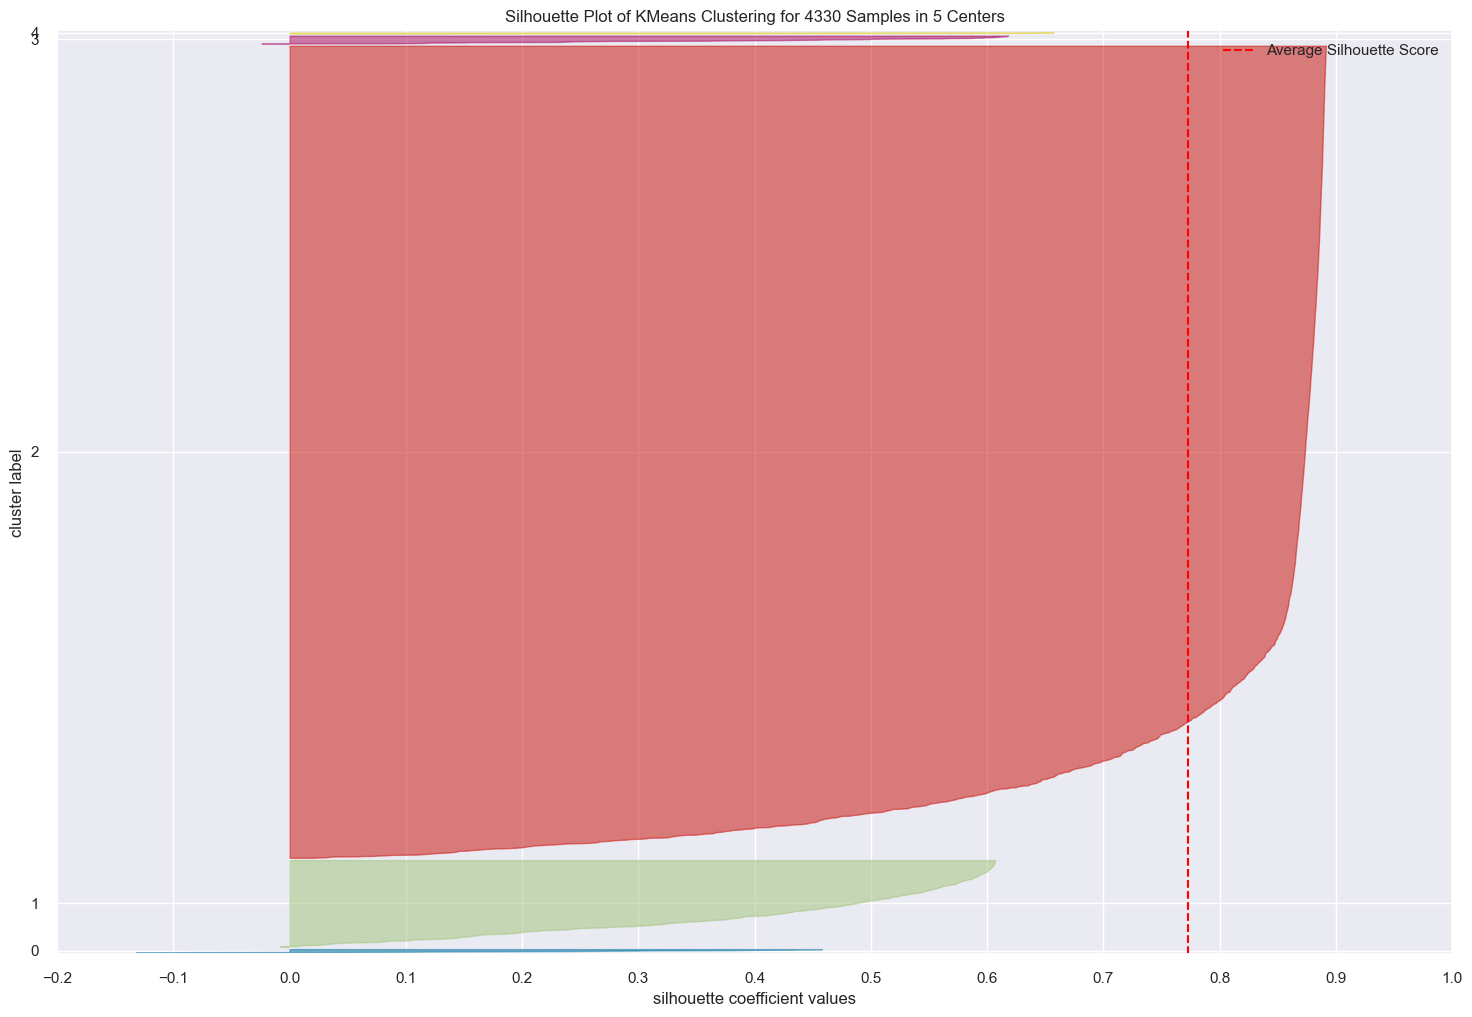

In [156]:
km = c.KMeans( n_clusters=5, init='random', n_init=10, max_iter=300, random_state=42 )
visualizer = SilhouetteVisualizer( km, colors='yellowbrick' )
visualizer.fit(X)
visualizer.finalize()

#### K = 6

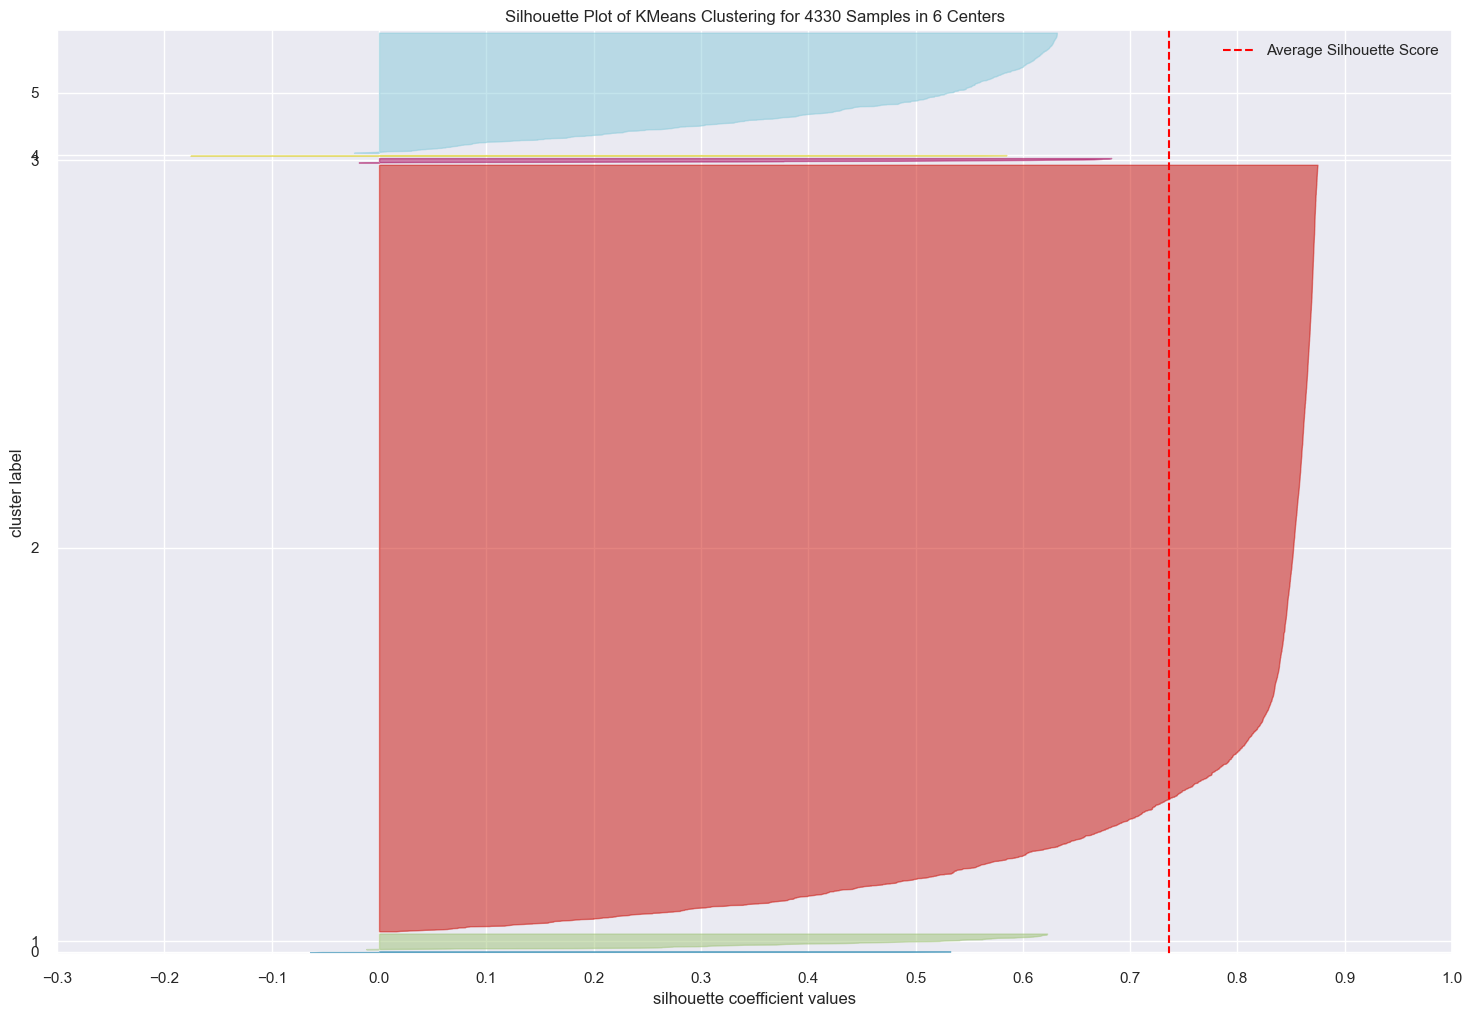

In [157]:
km = c.KMeans( n_clusters=6, init='random', n_init=10, max_iter=300, random_state=42 )
visualizer = SilhouetteVisualizer( km, colors='yellowbrick' )
visualizer.fit(X)
visualizer.finalize()

#### K = 7

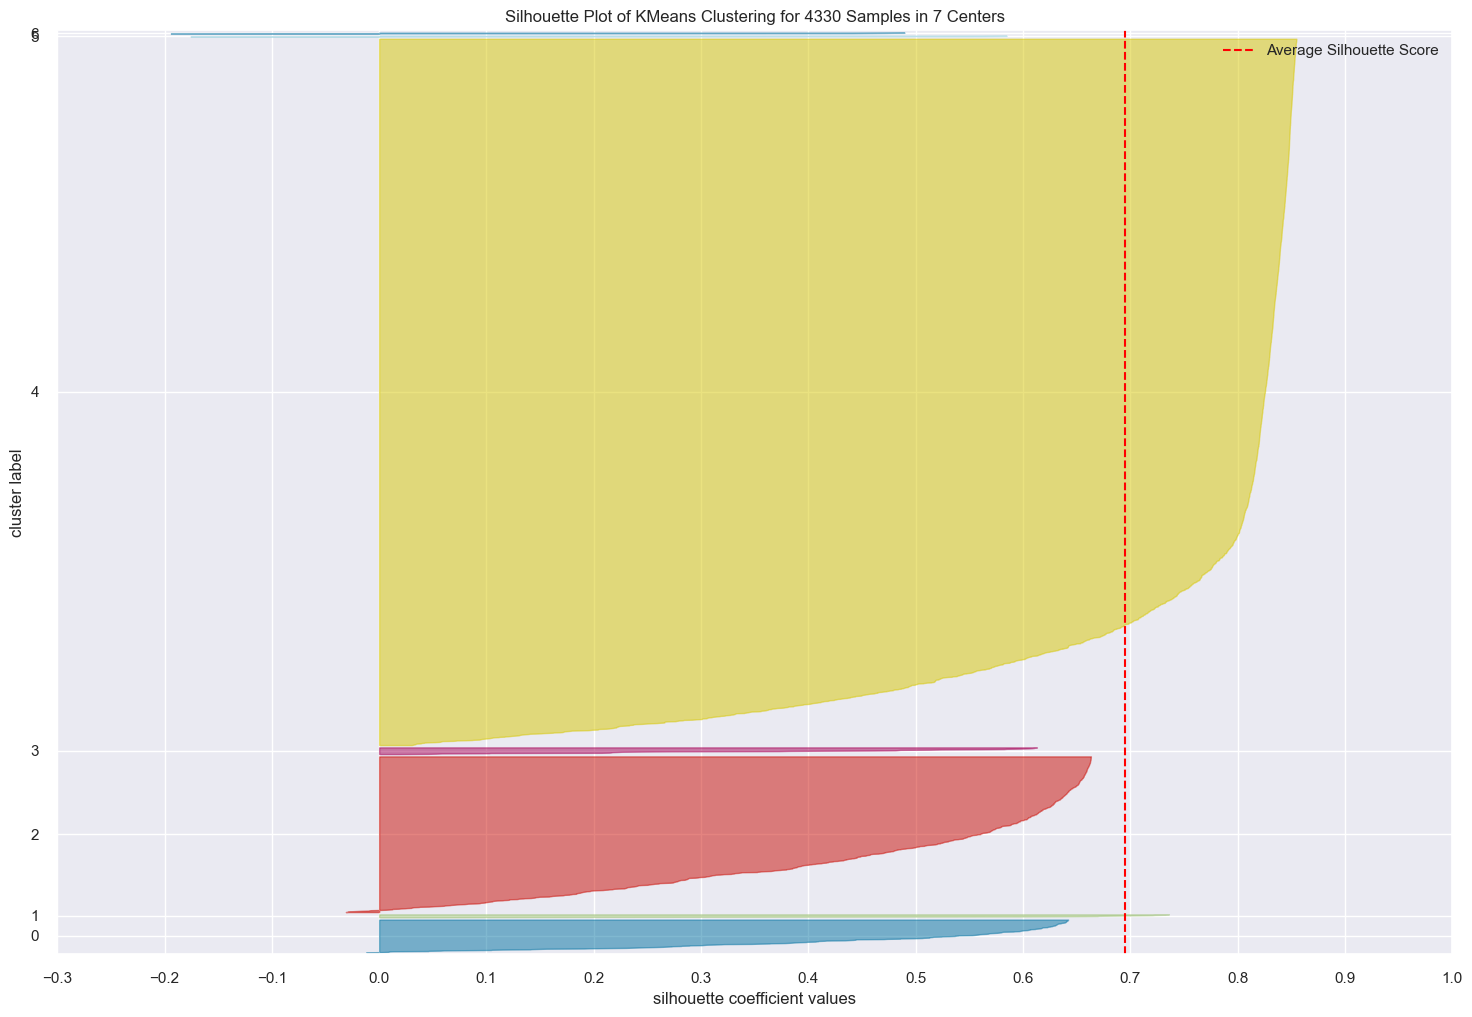

In [158]:
km = c.KMeans( n_clusters=7, init='random', n_init=10, max_iter=300, random_state=42 )
visualizer = SilhouetteVisualizer( km, colors='yellowbrick' )
visualizer.fit(X)
visualizer.finalize()

# 9.0 MODEL TRAINING

## 9.1 KMeans

In [159]:
# model definition
k = 5
kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )

# model training
kmeans.fit(X)

# clustering
labels = kmeans.labels_

## 9.2 Cluster Validation

In [160]:
from sklearn import metrics as m

In [161]:
# WSS
print('WSS value: {}'.format( kmeans.inertia_ ))

# SS
print('SS value: {}'.format( m.silhouette_score( X, labels, metric='euclidean' ) ) )

WSS value: 35877922731.2005
SS value: 0.7731573494813923


# 10.0 CLUSTER ANALYSIS

In [162]:
df10 = df7.copy()
df10['cluster'] = labels
df10.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5391.21,372.0,34.0,18.152222,1
1,13047,3232.59,56.0,9.0,18.904035,2
2,12583,6705.38,2.0,15.0,28.902500,1
3,13748,948.25,95.0,5.0,33.866071,2
4,15100,876.00,333.0,3.0,292.000000,2


## 10.1 Visualization Inspection

c:\Users\jocaf\anaconda3\envs\cluster\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


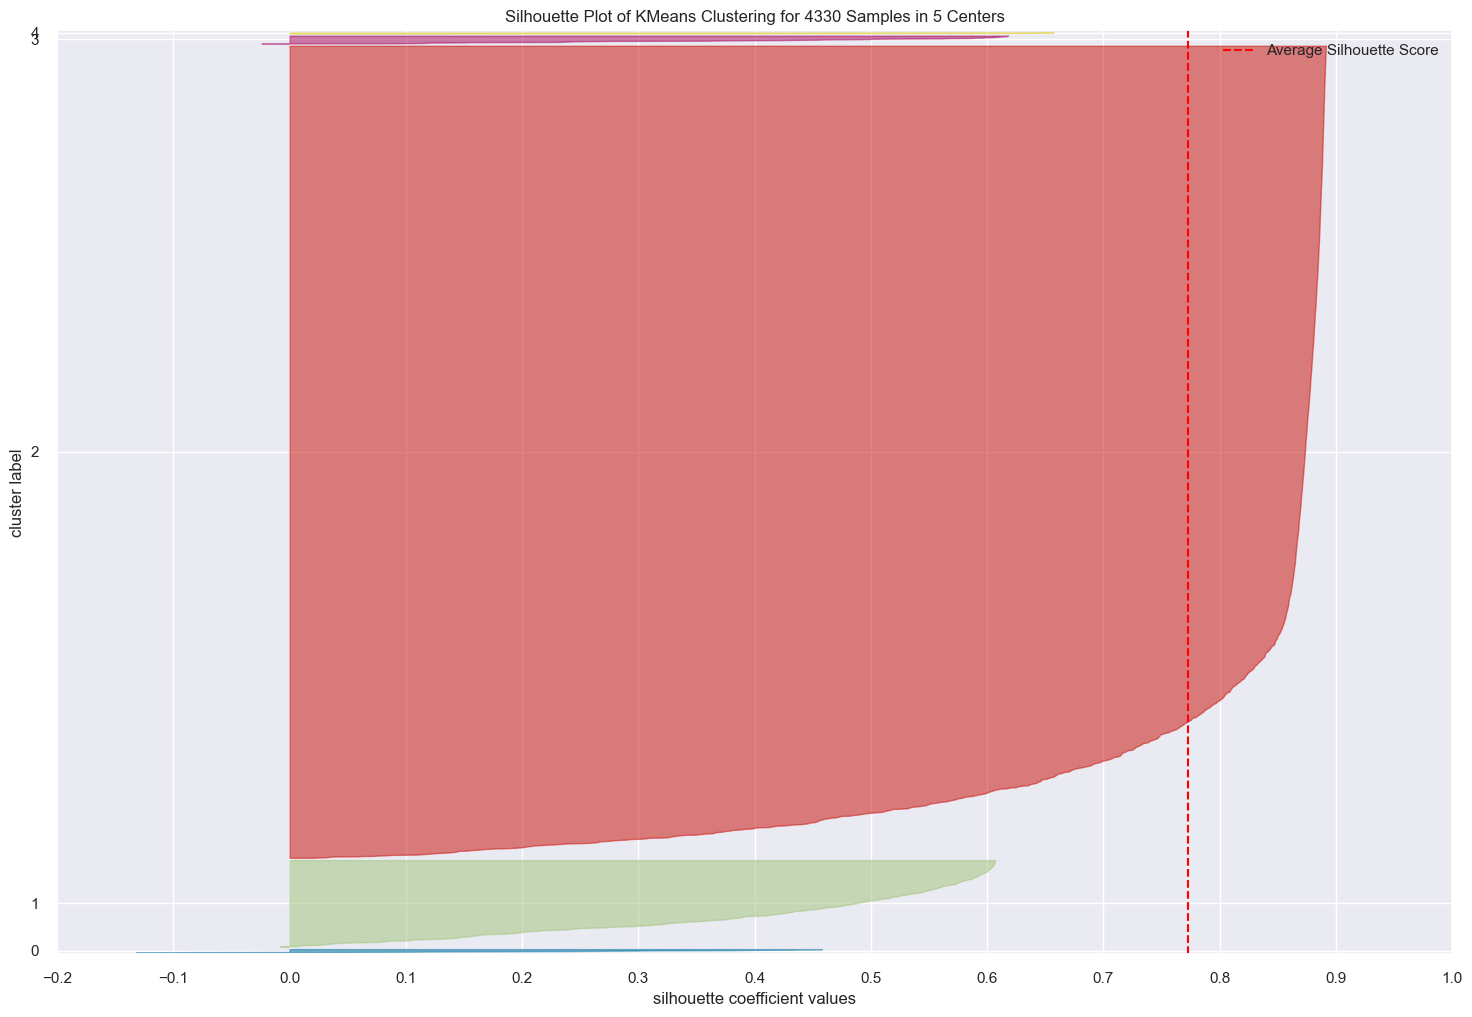

In [163]:
visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick' )
visualizer.fit( X )
visualizer.finalize()

## 10.2 2d_plot

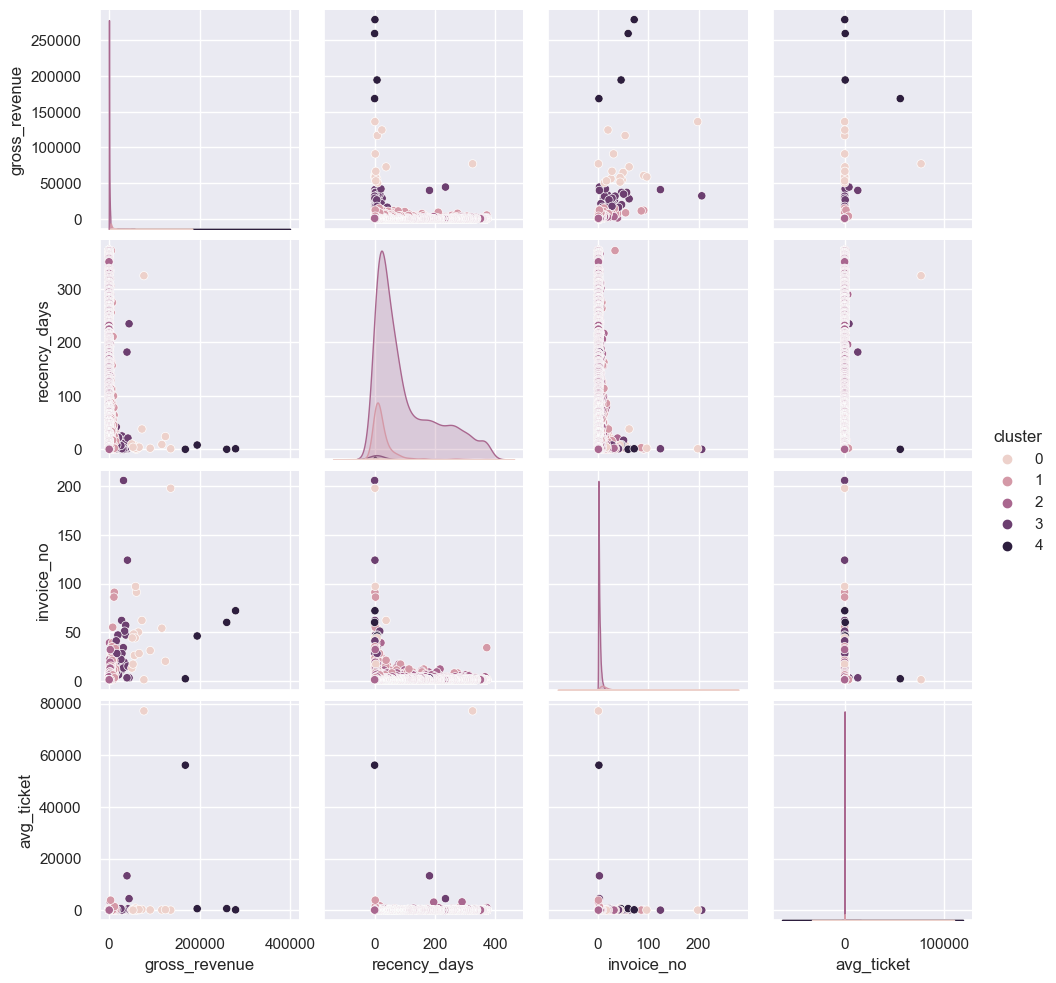

In [164]:
df_viz = df10.drop( columns='customer_id', axis=1 )
sns.pairplot( df_viz, hue='cluster')

## 10.3 UMAP - t-SNE

Machine Learning - Manifold

PCA - Matrix, Espaço de Distância - Espaço de Hilbert - 9 colorários

UMAP - t-SNE (2009) - Topologia

UMAP - Mais rapido para grande volume de dados, tem dificuldade pra visualização
t-SNE - Mas lento mas tem uma precisão melhor de visualização


<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

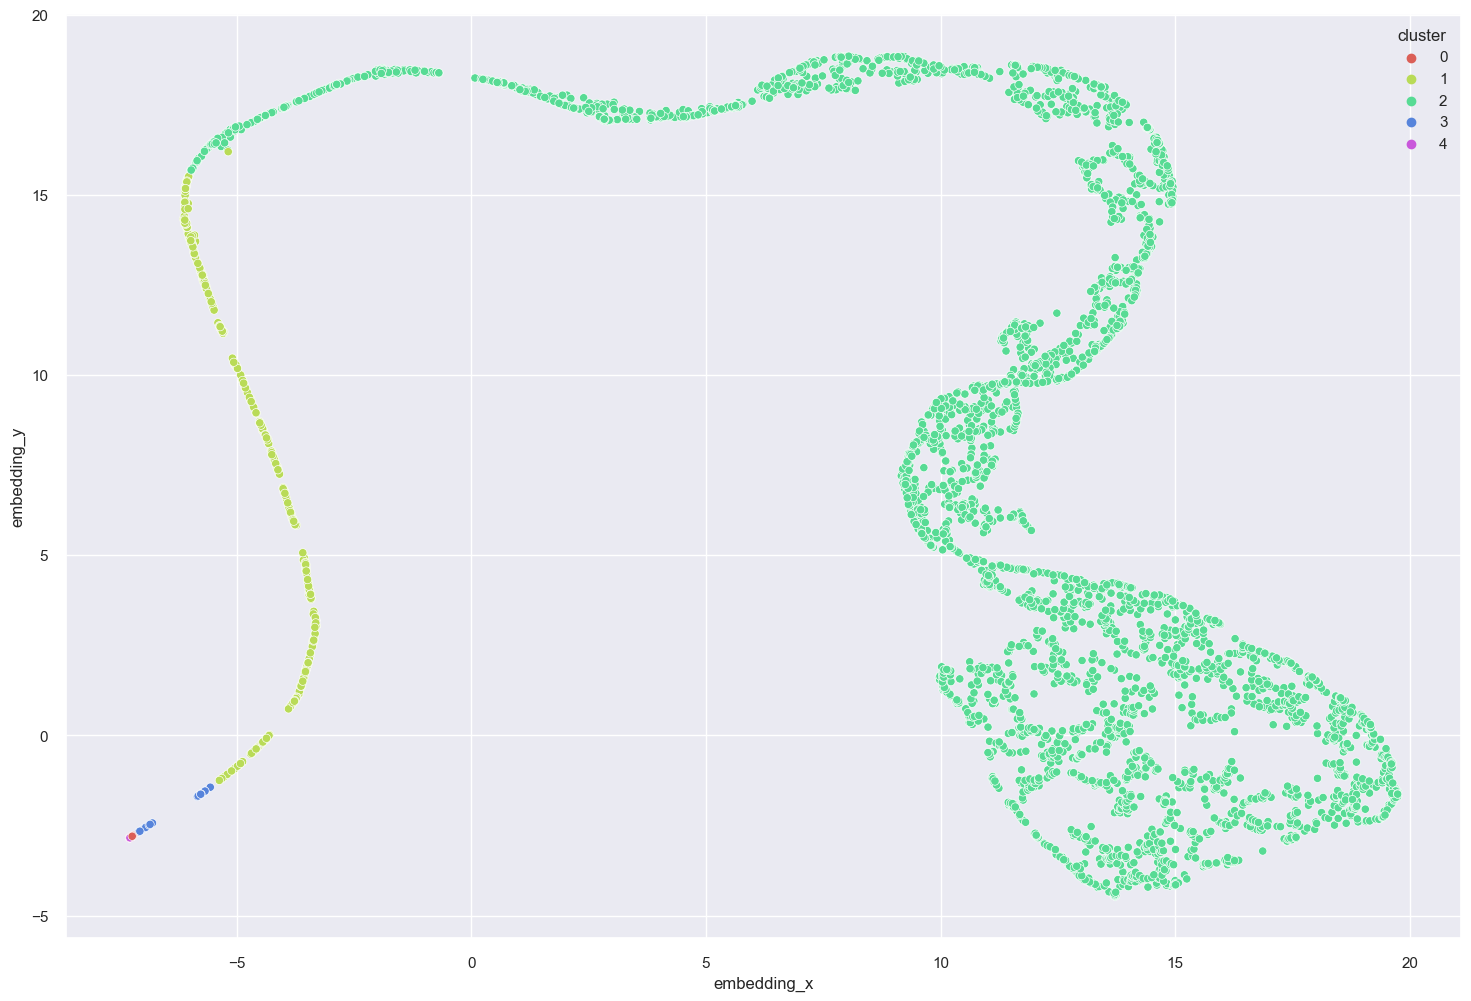

In [165]:
reducer = umap.UMAP( n_neighbors=20, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

# plot UMAP
sns.scatterplot( data=df_viz, x='embedding_x', y='embedding_y', hue='cluster', palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ) )

<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

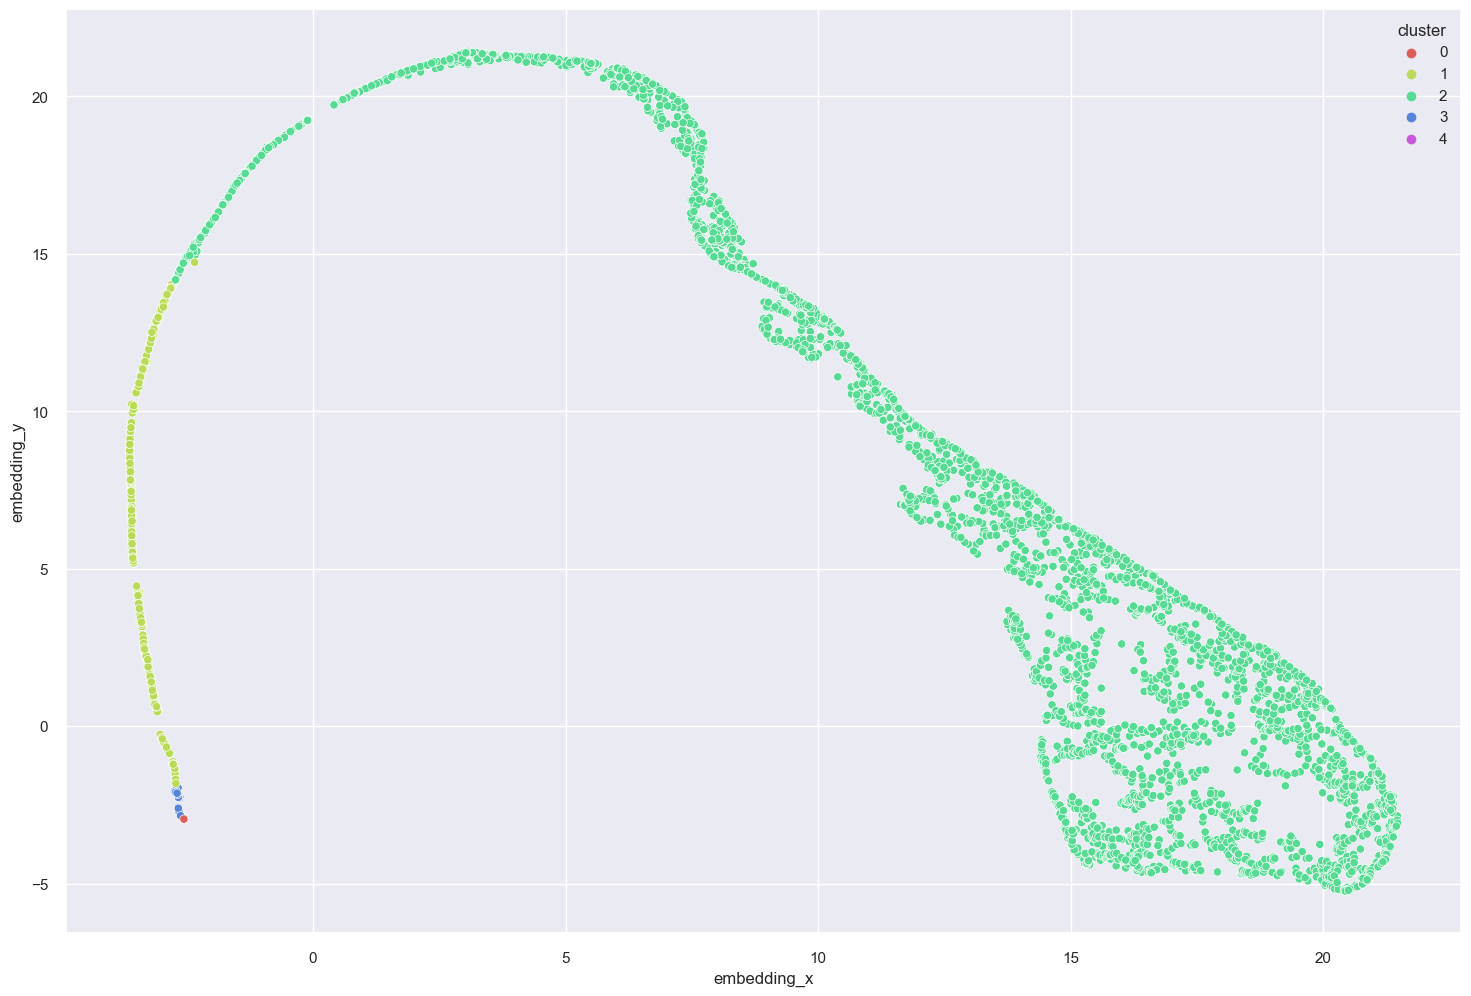

In [166]:
reducer = umap.UMAP( n_neighbors=40, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

# plot UMAP
sns.scatterplot( data=df_viz, x='embedding_x', y='embedding_y', hue='cluster', palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ) )

## 10.2 Cluster Profile

In [59]:
# Number of Costumer
df_cluster = df10[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100 * (df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# AVG Gross Revenue
df_avg_gross = df10[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross, how='inner', on='cluster')

# AVG Recency Days
df_avg_recency = df10[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency, how='inner', on='cluster')

# AVG Invoice Number
df_invoice_no = df10[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_invoice_no, how='inner', on='cluster')

# AVG Ticket 
df_ticket = df10[['avg_ticket', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_ticket, how='inner', on='cluster')

df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,43,0.991926,0.199137,0.012220,0.250255,0.018358
1,1,1962,45.259516,0.008055,0.046504,0.022826,0.000356
2,2,318,7.335640,0.002264,0.890249,0.001641,0.003715
3,3,1046,24.129181,0.003699,0.186442,0.008236,0.000350
4,4,454,10.472895,0.002085,0.645144,0.002407,0.000572
5,5,512,11.810842,0.002788,0.408486,0.005659,0.000789


# 11.0 DEPLOY TO PRODUCTION